# Flows with friction (Fanno flows)

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
from scipy.optimize import root_scalar

# Pint gives us some helpful unit conversion
from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity # We will use this to construct quantities (value + unit)

In [11]:
# these lines are only for helping improve the display
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'png')
plt.rcParams['figure.dpi']= 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['mathtext.fontset'] = 'cm'

After area change, friction is another important factor that controls compressible flow.
(Heat transfer is the third main factor.) 
Of course, in reality more than one of these factors can play a role at the same time—we'll examine those cases later.

**Fanno flow** is the specific case of adiabatic flow in a constant-area duct, with effects due to friction.

## Fanno flow theory

For a general fluid, we can apply conservation of mass: $ \dot{m} = \rho A V $, but since area is constant, we can introduce the **mass velocity**:

$$
G = \rho V = \text{constant} \;.
$$

Next, applying conservation of energy:

\begin{gather*}
h_{t1} + q = h_{t2} + w_s = h_t \\
\rightarrow h_t = h + \frac{V^2}{2} \\
V^2 = \left( \frac{G}{\rho} \right)^2 \rightarrow h_t = h + \frac{G^2}{2 \rho^2} = \text{constant} \;.
\end{gather*}

So, we have a relationship between $h$ and $\rho$ (or $v$) in a Fanno flow.

We can use these relationships to develop a $T-s$ or $h-s$ diagram, based on the property relationship

$$
T ds = dh - \frac{dp}{\rho} = du - \frac{p}{\rho^2} d\rho \;,
$$ (eq_entropy_relationship)

which we can rewrite for an ideal gas

$$
ds = \frac{du}{T} - R \frac{d\rho}{\rho} \;.
$$

Then, integrate this equation from some reference state 1:

$$
s - s_1 = c_v \log \frac{T}{T_1} - R \log \frac{\rho}{\rho_1} \;.
$$

From conservation of mass we have that $G = \rho V = \text{constant}$, or $\rho/\rho_1 = V_1 / V$, which we can use to substitute velocity for density in our expression:

$$
s - s_1 = c_v \log \frac{T}{T_1} + R \log \frac{V}{V_1} \;.
$$

Conservation of energy gave us that

$$
V = \sqrt{2 \left( h_t - h \right)} = \sqrt{2 c_p \left( T_t - T \right) } \;,
$$

which means 

$$
\frac{s - s_1}{c_v} = \log \left( \frac{T}{T_1} \right) + \frac{\gamma-1}{2} \log \left( \frac{T_t - T}{T_t - T_1} \right) \;.
$$

Finally, since $ c_p = \gamma c_v $, we can get

$$
\frac{s - s_1}{c_p} = \frac{1}{\gamma} \log \left( \frac{T}{T_1} \right) + \frac{\gamma-1}{2\gamma} \log \left( \frac{T_t - T}{T_t - T_1} \right) \;.
$$ (eq_fanno_entropy)

Based on given reference state, we can use Equation {eq}`eq_fanno_entropy` to construct a Fanno line on a $T-s$ diagram. Let's do that for a flow where $\gamma = 1.3$ in a constant-diameter duct with friction, using a reference Mach number $M_1 = 3.0$.
(The reference Mach gives us a way to obtain $T_t / T_1$ and compute relative static temperatures for other states.)

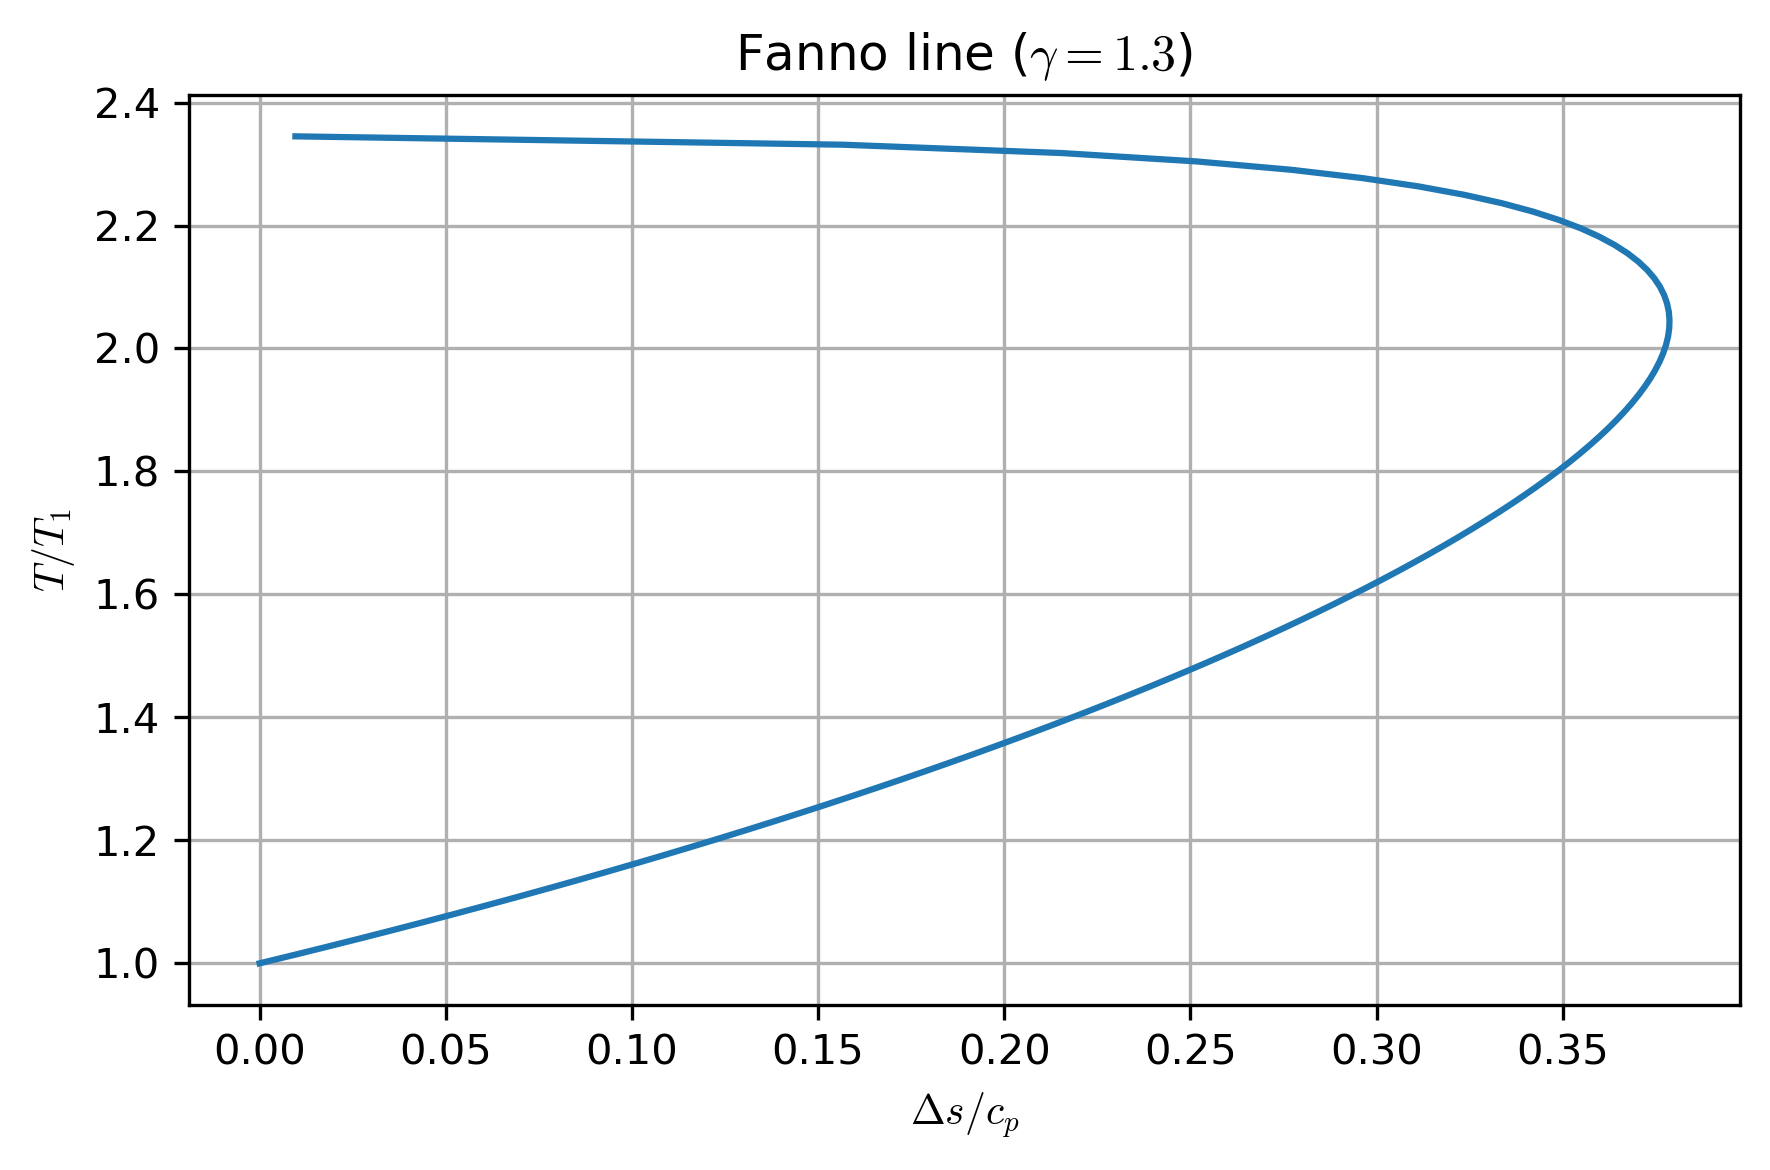

In [12]:
gamma = 1.3
M1 = 3.0
Tt_T1 = 1 + 0.5*(gamma-1)*M1**2

T_T1 = np.linspace(1.0, 2.345, 100)
delta_s_cp = (1/gamma)*np.log(T_T1) + (gamma-1)*np.log((Tt_T1 - T_T1)/(Tt_T1 - 1)) / (2*gamma)

fig, ax = plt.subplots()

ax.plot(delta_s_cp, T_T1)
ax.set_title(r'Fanno line ($\gamma = 1.3$)')
ax.set_xlabel(r'$\Delta s / c_p$')
ax.set_ylabel(r'$T / T_1$')
ax.grid(True)
#plt.savefig('fanno-line.png')
plt.tight_layout()
plt.show()
#plt.close()

We can see that there is some limiting point associated with maximum entropy, which separates an upper branch and lower branch. Given any initial state, proceeding downstream will cause the flow to progress to the right on the Fanno line, towards the limiting point, because $ ds > 0 $ always due to friction.

If the flow starts somewhere on the *upper* branch, moving downstream means that as entropy increases, the enthalpy decreases, density decreases, velocity increases, and static pressure decreases.

In contrast, if the flow starts on the *lower* branch, moving downstream means that as entropy increases, the enthalpy increases, density increases, velocity decreases, and static pressure increases.

In both cases, stagnation pressure always decreases, due to the stagnation-pressure energy equation:

\begin{gather*}
\frac{d p_t}{\rho_t} + d s_e (T_t - T) + T_t ds_i + \delta w_s = 0 \\
\rightarrow \frac{d p_t}{\rho_t} = - T_t ds \;,
\end{gather*}

where $ ds = ds_i > 0 $.

### Limiting point

Clearly the limiting point of maximum entropy is important, because it separates regions of opposite behavior. Let's now identify what that state is.

From conservation of mass, we have $ G = \rho V = $ constant. 
From conservation of energy, we also have that $ h_t = h + V^2/2 = $ constant. We can take the derivatives of each of these:

\begin{gather*}
dG = \rho dV + V d \rho = 0 \\
\rightarrow dV = -V \frac{d\rho}{\rho}
d h_t = dh + V dV = 0 \\
0 = dh + V \left( -V \frac{d\rho}{\rho} \right) \\
0 = dh - V^2 \frac{d\rho}{\rho} \\
dh = V^2 \frac{d\rho}{\rho} \;.
\end{gather*}

We can substitute this in one of the thermodynamic relationships derived from Gibbs' identities:

\begin{gather*}
T ds = dh - v dp = dh - \frac{dp}{\rho} \\
\rightarrow T ds = V^2 \frac{d\rho}{\rho} - \frac{dp}{\rho} \;.
\end{gather*}

This relationship applies to any fluid, between two differentially separated states on a Fanno line.
Let's apply this to an ideal gas, at two points right around the limiting point of maximum entropy. At this location, entropy is constant, so $ ds = 0 $:

\begin{gather*}
0 = V^2 \frac{d\rho}{\rho} - \frac{dp}{\rho} \\
dp = V^2 d \rho \\
V^2 = \left( \frac{dp}{d\rho} \right)_{\text{limiting point}} = \left( \frac{\partial p}{\partial \rho} \right)_{s} \\
\therefore V^2 = a^2
\end{gather*}

and we see that the velocity is sonic at the limiting point.

```{admonition} Fanno flow
:class: tip

The upper branch of a Fanno line corresponds to **subsonic** flow, and the lower branch corresponds to **supersonic** flow. Regardless of the branch, proceeding in a Fanno flow always moves the flow towards the sonic velocity, due to increasing entropy.
```

## Fanno flow analysis

We can apply a control volume analysis using our governing equations to adiabatic flow in a constant-area duct with friction.

:::{figure-md} fig-fanno-cv
<img src="../images/fanno-flow-control-volume.*" alt="Control volume for Fanno flow" class="bg-white mb-1" width="400px">

Differential control volume for adiabatic flow in a constant-area duct with friction.
:::

{numref}`Figure {number}<fig-fanno-cv>` shows a control volume in a constant-area duct, where the flow starts out with velocity $V$, density $\rho$, and pressure $p$. The width of the differential control volume is $dx$, the cross-sectional area of the duct is $A$, and the wetted surface area is $A_s$. The friction force $F_f$ is equivalent to the product of shear stress due to wall friction $\tau_f$ and $A_s$.

### Conservation of energy

Applying conservation of energy to this control volume, we see that

\begin{gather*}
h_{t1} = h_{t2} = h_t \\
T_{t1} = T_{t2}
\end{gather*}

and so we can get a working relationship between static temperatures in a Fanno flow:

$$
\frac{T_2}{T_1} = \frac{2 + (\gamma-1) M_1^2}{2 + (\gamma-1) M_2^2} \;.
$$ (eq_fanno_temperature)

### Conservation of mass

From conservation of mass, we see that

\begin{gather*}
\rho V = G = \text{constant} \\
\rho_1 V_1 = \rho_2 V_2 \\
\frac{p_2}{p_1} = \frac{M_1}{M_2} \left( \frac{T_2}{T_1} \right)^{1/2} \;,
\end{gather*}

and we can substitute {eq}`eq_fanno_temperature` to get a relationship between pressure at two locations:

$$
\frac{p_2}{p_1} = \frac{M_1}{M_2} \left( \frac{2 + (\gamma-1) M_1^2}{2 + (\gamma-1) M_2^2} \right)^{1/2} \;.
$$ (eq_fanno_pressure)

Using the ideal gas law $ p = \rho R T $, we can easily convert this into a relationship for density:

$$
\frac{\rho_2}{\rho_1} = \frac{M_1}{M_2} \left[ \frac{2 + (\gamma-1) M_2^2}{2 + (\gamma-1) M_1^2} \right]^{1/2} \;.
$$ (eq_fanno_density)

Based on the property relationship for entropy

$$
\Delta s_{1-2} = c_p \log \frac{T_2}{T_1} - R \log \frac{p_2}{p_1}
$$

we can obtain a working relationship for stagnation pressure as well, based on just the Mach numbers at two locations in the flow:

$$
\frac{p_{t2}}{p_{t1}} = \frac{M_1}{M_2} \left( \frac{2 + (\gamma-1) M_2^2}{2 + (\gamma-1) M_1^2} \right)^{\frac{\gamma+1}{2(\gamma-1)}} \;.
$$ (eq_fanno_stag_pressure)

### Conservation of momentum

Finally, we can apply conservation of momentum to the control volume, where we have both pressure and wall friction forces acting on the fluid:

\begin{gather*}
\sum F_x = \dot{m} \left( V_{\text{out}, x} - V_{\text{in}, x} \right) \\
pA - (p + dp) A - \tau_f A_s = (\rho A V) \left[ (V + dV) - V \right] \\
- A dp - \tau_f A_s = \rho A V dV
\end{gather*}

and we can introduce the hydraulic or effective diameter

$$
D_h = \frac{4 A}{P} \;,
$$

where $ P $ is the perimeter. For a circular duct $ D_h = D $.
We can also express the surface area as $ A_s = P dx $. 
We can also introduce the **Darcy friction factor** or friction coefficient to replace directly using the shear stress:

$$
f \equiv \frac{4 \tau_f}{\frac{1}{2} \rho V^2} \;,
$$

which can be found empirically as a function of Reynolds number and relative surface roughness ($\epsilon/D$) using a Moody chart, shown in {numref}`Figure {number}<fig-moody>`.

:::{figure-md} fig-moody
<img src="../images/moody.*" alt="Moody chart" class="bg-white mb-1" width="600px">

Moody chart, showing Darcy friction factor for flow in a pipe as a function of Reynolds number (Re) and relative surface roughness ($ \epsilon/D $). 
Original diagram: S Beck and R Collins, University of Sheffield (Donebythesecondlaw at English Wikipedia).
Conversion to SVG: Marc.derumaux, [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0), via [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Moody_EN.svg).
:::

Then,

\begin{gather*}
-dp - \frac{1}{2} \rho V^2 f \frac{dx}{D} = \rho V dV \\
\frac{dp}{p} + \frac{1}{2} \gamma M^2 f \frac{dx}{D} + \gamma M^2 \frac{dV}{V} = 0 \;.
\end{gather*}

If we perform further substitutions for $dV/V$ and $dp/p$ using $\rho V = $ constant, the ideal gas law, and definition of the Mach number, we can get an integrable equation.
Integrating from a state where where $M = M_1$ at some location $x_1$ to where $M = M_2$ at location $x_2$, we get

$$
\frac{f \Delta x}{D_e} = \frac{\gamma+1}{2\gamma} \log \left[ \frac{2 + (\gamma-1) M_2^2}{2 + (\gamma-1) M_1^2} \right] - \frac{1}{\gamma} \left( \frac{1}{M_2^2} - \frac{1}{M_1^2} \right) - \frac{\gamma+1}{2 \gamma} \log \frac{M_2^2}{M_1^2} \;,
$$ (eq_fanno_length)

which relates the distance in a Fanno flow to the Mach numbers: $ \Delta x = f(\gamma, M_1, M_2) $.

We can then express these working relationships as functions:

In [4]:
def get_fanno_distance(mach_1, mach_2, gamma=1.4):
    '''Get Fanno friction distance (f Δx/D) given two Mach numbers'''
    return (
        ((gamma + 1)/(2 * gamma)) *
        np.log((2 + (gamma - 1)*mach_2**2) / (2 + (gamma - 1)*mach_1**2)) -
        (1/gamma)*(1/mach_2**2 - 1/mach_1**2) -
        (gamma + 1) * np.log(mach_2**2 / mach_1**2) / (2*gamma)
        )

def solve_fanno_mach(mach_2, mach_1, friction_factor, delta_x, diameter, gamma=1.4):
    '''Use to solve for downstream Mach in Fanno flow'''
    return (
        friction_factor*delta_x/diameter - get_fanno_distance(mach_1, mach_2, gamma)
        )

def get_fanno_temperature_ratio(mach_1, mach_2, gamma=1.4):
    '''Return T2/T1 for Fanno flow'''
    return (
        (2 + (gamma-1)*mach_1**2) / (2 + (gamma-1)*mach_2**2)
        )

def get_fanno_pressure_ratio(mach_1, mach_2, gamma=1.4):
    '''Return p2/p1 for Fanno flow'''
    return (
        (mach_1 / mach_2) * 
        np.sqrt((2 + (gamma-1)*mach_1**2)/(2 + (gamma-1)*mach_2**2))
        )

def get_fanno_stag_pressure_ratio(mach_1, mach_2, gamma=1.4):
    '''Return pt2/pt1 for Fanno flow'''
    return (
        (mach_1 / mach_2) * (
            (2 + (gamma-1)*mach_2**2) / 
            (2 + (gamma-1)*mach_1**2)
            )**((gamma + 1) / (2*(gamma - 1)))
        )

## Fanno sonic reference state

The * reference state for a Fanno flow is the state that would exist if the flow continued until the Mach number is 1.0, through additional length of duct (with friction).
Since this is the limiting point on a Fanno line, all states in a given Fanno flow share the same * reference state.

$$
\frac{f L_{\max}}{D_e} = \left( \frac{\gamma+1}{2\gamma} \right) \log \left( \frac{\gamma+1}{2 + (\gamma-1) M^2} \right) - \frac{1}{\gamma} \left( 1 - \frac{1}{M^2} \right) - \left( \frac{\gamma+1}{2\gamma} \right) \log \left(\frac{1}{M^2}\right)
$$ (eq_fanno_reference_length)

where $L_{\max}$ = $x^* - x$ is the maximum length of duct allowable on the Fanno line from the given state before reaching the limiting point.
We can express Equations {eq}`eq_fanno_temperature`, {eq}`eq_fanno_pressure`, {eq}`eq_fanno_density`, and {eq}`eq_fanno_stag_pressure` between any point in a Fanno flow as $ f (\gamma, M) $:

$$
\frac{T}{T^*} = \frac{\gamma+1}{2 + (\gamma-1) M^2}
$$  (eq_fanno_reference_temperature)

$$
\frac{p}{p^*} = \frac{1}{M} \left[ \frac{\gamma+1}{2 + (\gamma-1)M^2}\right]^{1/2}
$$ (eq_fanno_reference_pressure)

$$
\frac{\rho}{\rho^*} = \frac{1}{M} \left[ \frac{2 + (\gamma-1) M^2}{\gamma+1}\right]^{1/2}
$$ (eq_fanno_reference_density)

$$
\frac{p_t}{p_t^*} = \frac{1}{M} \left[ \frac{2 + (\gamma-1) M^2}{\gamma+1}\right]^{\frac{\gamma+1}{2(\gamma-1)}}
$$ (eq_fanno_reference_stag_pressure)

In [5]:
def get_fanno_max_length(mach, gamma=1.4):
    '''Get maximum Fanno friction length (f L_max / D) given Mach number'''
    return (
        ((gamma + 1)/(2 * gamma)) *
        np.log((gamma + 1) / (2 + (gamma - 1)*mach**2)) -
        (1/gamma)*(1 - 1/mach**2) -
        (gamma + 1) * np.log(1 / mach**2) / (2*gamma)
        )

def solve_fanno_reference_mach(mach, friction_factor, L_max, diameter, gamma=1.4):
    '''Use to solve for downstream Mach in Fanno flow'''
    return (
        friction_factor*L_max/diameter - get_fanno_max_length(mach, gamma)
        )

def get_fanno_reference_pressure(mach, gamma=1.4):
    '''Return p/p* for Fanno flow'''
    return (
        (1 / mach) * 
        np.sqrt((gamma + 1) / (2 + (gamma-1)*mach**2))
        )

## Example: constant-area duct following nozzle

Consider a system with an isentropic converging-diverging nozzle that flows into a 2.4 m section of constant-diameter duct (with diameter 0.14 m), exhausting into 1 bar pressure. The area ratio of the nozzle is 5.42, and the friction factor in the constant-diameter section if 0.02.

Find the minimum stagnation pressure in the supply for the nozzle if the flow is all supersonic in the system, starting at the throat.

First, we need to determine the supersonic flow operation of the nozzle (the third critical). For an area ratio $A_3 / A_2$, we can solve for the outlet Mach number $M_3$ and pressure ratio $p_3 / p_{t3}$:

In [6]:
# isentropic relationships
def get_reference_area(mach, gamma):
    '''Calculate reference area ratio'''
    return ((1.0/mach) * ((1 + 0.5*(gamma-1)*mach**2) / 
            ((gamma + 1)/2))**((gamma+1) / (2*(gamma-1)))
            )

def solve_mach_area(mach, area_ratio, gamma):
    '''Used to find Mach number for given reference area ratio and gamma'''
    return (area_ratio - get_reference_area(mach, gamma))

def get_stagnation_pressure_ratio(mach, gamma):
    '''Calculate p/pt given Mach number'''
    return (1 + 0.5*(gamma - 1)*mach**2)**(-gamma/(gamma - 1))

In [7]:
gamma = 1.4
area_ratio = 5.42
pt1_pt3 = 1.0 # isentropic nozzle

diameter = Q_(0.14, 'm')
f = 0.02
p_rec = Q_(1, 'bar')
length = Q_(2.4, 'm')

root = root_scalar(solve_mach_area, x0=2.0, x1=3.0, args=(area_ratio, gamma))
M3 = root.root
print(f'Nozzle outlet M3 = {M3: .3f}')

p3_pt3 = get_stagnation_pressure_ratio(M3, gamma)
print(f'p3/pt3 = {p3_pt3: .4f}')

Nozzle outlet M3 =  3.260
p3/pt3 =  0.0185


Next, for the length of duct with friction, the inlet and outlet share the same Fanno sonic reference state, so

$$
L_{3, \max} = \Delta x + L_{4, \max}
$$

and we can then find $M_4$ using $\frac{f L_{4, \max}}{D}$:

In [8]:
fL3_max_D = get_fanno_max_length(M3, gamma)
fL4_max_D = fL3_max_D - (f * length / diameter)
L4_max = fL4_max_D * diameter / f

root = root_scalar(
    solve_fanno_reference_mach, x0=2, x1=3, 
    args=(f, L4_max, diameter, gamma)
    )
M4 = root.root
print(f'M4 = {M4: .3f}')

p3_p3star = get_fanno_reference_pressure(M3, gamma)
p4_p4star = get_fanno_reference_pressure(M4, gamma)
p3star_p4star = 1.0

# p4 = p_rec
pt1 = pt1_pt3 * (1/p3_pt3) * p3_p3star * p3star_p4star * (1/p4_p4star) * p_rec
print(f'Supply stagnation pressure: {pt1.to("bar"): .2f}')

M4 = 1.722 dimensionless
Supply stagnation pressure: 20.35 bar
